# Guide 2: Public Cloud Storage with Microsoft Azure

Public Cloud storage is the service that allow you to keep data on a remote server. You can use your data but instead of querying them from documents saved in your hardware, they are secure in another place depending from the location you choose for your Azure Storage Account.  
It is somehow expensive (**TODO** explain).  
You can communicate how (**TODO** explain). 

What is storage

In this tutorial we are going to explain: a), b) , c)

*TODO Point out some resources and explain why they are good (add links).

# Table of Contents
* [Guide 2: Public Cloud Storage with Microsoft Azure](#Guide-2:-Public-Cloud-Storage-with-Microsoft-Azure)
    * [Cloud storage versus cloud computing](#Cloud-storage-versus-cloud-computing)
    * [Azure Blob Storage](#Azure-Blob-Storage)
        * [Concepts](#Concepts)
        * [Upload file to Azure Blob Storage with Storage Explorer](# broken)
        * [Upload file to Azure Blob Storage with API](# broken)
        * [Explore file inside Azure Blob Storage](# broken)
    * [Azure Machine Learning Studio](# broken)    
        * [Upload file to Machine Learning Studio](# broken)      
        * [Explore file inside Machine Learning Studio](# broken)
    * [Experiment Set Up](# broken)    
    * [Recap](# broken)

## Cloud storage versus cloud computing

Terms such as “cloud storage” and “cloud computing” are oftentimes used interchangeably. One may be tempted to believe they have the same meaning, but this is far from the truth. Indeed, they are actually different concepts eventhough they derived from the same source the cloud. The public cloud storage is a system that allows you to store data on the Internet, as you would save on your own computer. Some popular examples are Google Drive, DropBox, or iCloud,  for which the definition of cloud storage remains the same. Cloud computing, on the other hand, is used to work on and complete specified projects. Cloud computing is linked with cloud storage in that you have to move data to the cloud storage before you can make use of cloud computing systems. In the next part of the guide we are introducing Microsoft's object storage solution called Azure Blob storage and the one used for Machine Learning Studio (**to check:** they have different uses, not sure yet if it is just to different ways of accessing the same cloud storage).

## Azure Storage Account

Azure Blob storage is Microsoft's solution for the cloud and it stores massive amounts of unstructured data, such as text or binary data. Blob storage is ideal for serving images or documents directly to a browser, for storing files for distributed access and in our case for analysis by an on-premises or Azure-hosted service. Objects in Blob storage can be accessed from anywhere in the world via HTTP or HTTPS. We are going to access blobs storage via URLs using the Azure Storage REST API. 

#### Concepts

As detailed in the Azure Blob Storage documentation, the service uses three resources [Blob service concepts](https://docs.microsoft.com/en-us/azure/storage/blobs/storage-blobs-introduction#blob-service-concepts): your storage account, the containers in the account, and the blobs in a container. The following diagram shown in the  the relationship between these resources.

![public_cloud_storage_concepts](img/public_cloud_storage_concepts.png)

**to check:** image size change image to be similar to  (use CSS)

 - The **Storage Account** provides a unique namespace to store and access your Azure Storage data objects. All objects in a storage account are billed together as a group. By default, the data in your account is available only to you.
 - The **Container** provides a grouping of a set of blobs. All blobs must be in a container. It is similar to a folder in a file system.
 - The **Blob**, Binary Large OBject (BLOB), is a collection of binary data stored as a single entity in a database management system [[wiki/Binary_large_object](https://en.wikipedia.org/wiki/Binary_large_object)]. Blobs are typically images, audio or other multimedia objects, though sometimes binary executable code is stored as a blob. Azure Storage offers *three types of blobs*: block blobs, page blobs, and append blobs. Block blobs are ideal for storing text or binary files, such as documents and media files.

### Upload file to Azure Blob Storage with Storage Explorer

Before to upload files to the storage we need to download and install Storage Explore an application that allows users to upload blobs to a container in the public cloud. Follow the to launch the appliction steps:

- Go to https://azure.microsoft.com/en-us/features/storage-explorer/ and download Storage Explore for your operating system

- Install and launch the application

- Connect to Azure storage using account name and key ([see point 6 from the link](#Login-to-Azure-Dashboard-and-create-your-first-service))

![public_cloud_upload_file_ABS](img/public_cloud_upload_file_ABS.png)

- Create a blob container (from storage explorer under your storage service, right clik on Blob Containers icon)

![Add images](figs/name.png)

- Give the container a unique name (e.g. cloudcomputingcontainer)

![Add images](figs/name.png)

- Right click on new container, select Set Public Access Level, and apply Public read access for container and blobs (no need for a key to access content)

![Add images](figs/name.png)

- Upload files to the container clicking on icon (download from github repo?)

![Add images](figs/name.png)

- Select file and blob type (what are other type)

![Add images](figs/name.png)

## Blob Container with Storage Explorer

### Set your first blob container


10. Go to https://azure.microsoft.com/en-us/features/storage-explorer/ and download Storage Explore for your operating system
11. Install and launch the application
12. Connect to Azure storage using account name and key (from point 9)
13. Create a blob container (from storage explorer under your storage service, right clik on Blob Containers icon)
14. Give the containe a unique name (e.g. cloudcomputingcontainer)

### Upload blobs to the container

15. Right click on new container, select Set Public Access Level, and apply Public read access for container and blobs (no need for a key to access content)
16. Upload files to the container clicking on icon (download from github repo?)
17. Select file and blob type

### Read files in the Container? 

Is it possible?

#### Useful links

- Azure Storage documentation: https://docs.microsoft.com/en-us/azure/storage/ #here you can see language available

- Azure Storage princing:https://azure.microsoft.com/en-us/pricing/details/storage/

- Azure Storage quickstart: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python

- Azure Storage SDK: https://github.com/Azure/azure-storage-python/tree/master/azure-storage-blob

#### other resources:
- https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python

-https://github.com/squillace/staging/blob/master/articles/storage/storage-python-how-to-use-blob-storage.md

#### Community: active community to try stuff (show how to navigate, select example for Python)

https://azure.microsoft.com/en-us/resources/samples/?sort=0

https://github.com/Azure/azure-storage-python/tree/master/azure-storage-blob

https://github.com/Azure/azure-sdk-for-python

## Blob Container with Python

### Read Blob with your notebook

##### Motivate why we should do this

To access the files in the container you will need to:
- install Azure software development kit (SDK) for python: 
    - pip install azure. 
    - Documentation go to  https://github.com/Azure/azure-storage-python/tree/master/azure-storage-blob #add img mac/windows/linux
- import BlockBlobService module from the Azure SDK 
- retrieve storage a) name, b) key, and c) container name 
- instantiate the BlockBlobService object (IMPORTANT)
- call method list_blob() to retrieve a list of the file you uploaded
- iterate over the list generator to store BLoBs' name and URLs

In [107]:
#from azure library import methods to use storage 
from azure.storage.blob import BlockBlobService

#retrive your keys
import pickle
with open('../keys/azure_services_keys.json', 'rb') as handle:
    azure_keys = pickle.load(handle)

#select storage account name and API key from keys
storage_name = azure_keys['STORAGE']['NAME']
storage_key = azure_keys['STORAGE']['API_KEY']

#copy the container name 
container_name = 'mynamecontainer' #add your account name

#######################

#TO FIND CONTAINER NAME:
#go to Storage Explorer > your_storage > blob containers > your_container
#go to Dashboard > your_storage > Storage Explorer (preview) > your_container

In [108]:
#instanciate a BLoB service object
blob_service = BlockBlobService(storage_name, storage_key)

#generate list of files uploaded in your container
uploaded_file = blob_service.list_blobs(container_name)

#set BLoB url format
blob_url_format = 'https://{0}.blob.core.windows.net/{1}/{2}'

#store BLoBs' name and urls in a container
blob_name_list = []
blob_url_list = []
for blob in uploaded_file:
    blob_name_list.append(blob.name)
    blob_url_list.append(blob_url_format.format(blob_service.account_name, blob_container_name, blob.name))
print("This is the first file name: {}".format(blob_name_list[0]))
print("This is the url of the first file uploaded in the container:\n \t{}".format(blob_url_list[0]))

This is the first file name: bunch_of_people.jpg
This is the url of the first file uploaded in the container:
 	https://mynamecloudstorage.blob.core.windows.net/mynamecontainer/bunch_of_people.jpg


### Display Blob

Let us now print the first image in the blob list. First we have to read the image from the blob storage as byte array and then plot it. To display images from containers into notebook do the following:

- import libraries to display image
- call method get_blob_to_bytes() to downloads a blob as an array of bytes (it takes blob service instantied before and a blob name as input)
- store bytes into local memory (use method .content to extract byte stream from object)
- read bytes and display image in the notebook

In [109]:
#import libraries
import io
from PIL import Image
import matplotlib.pyplot as plt
#allow to print images in this notebook
%matplotlib inline

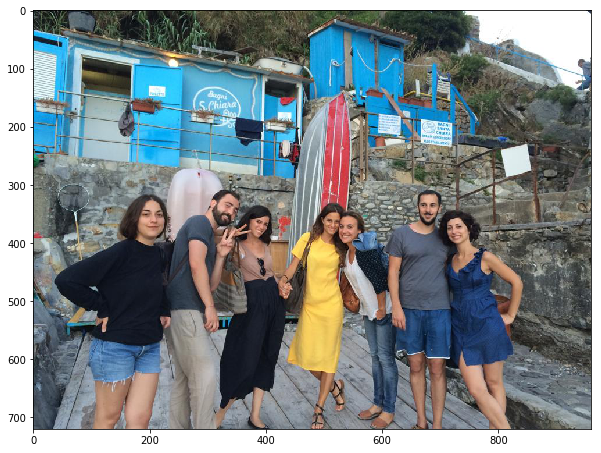

In [110]:
#read the images as byte array
blob_bytes = blob_service.get_blob_to_bytes(container_name, blob_name_list[1])

#store byte stream from object 
blob_bytes_in_memory = io.BytesIO(blob_bytes.content)

#read bytes and display image
img_bytes = Image.open(blob_bytes_in_memory)
plt.figure(figsize=(10,10))
plt.imshow(img_bytes);

In [90]:
#BOX
#what is inside the blob? byte stream
    
blob_bytes.content[0:20]

b'\xff\xd8\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01'

### Upload blobs to the container

- set a new container name
- call method create_container() from the blob service
- call method set_container_acl() from the blob service to set the permission container permission. 
- set public access (if you want private, then provide key to the service)

- store bytes into local memory (use method .content to extract byte stream from object)
- read bytes and display image in the notebook

In [117]:
#set a name for a new container
new_container_name ='playgroundcontainer2'

#create a new container 
blob_service.create_container(new_container_name) 

#set the blobs' permission 
blob_service.set_container_acl(new_container_name, public_access=None)

#####
#show this one with Explorer open
#what if I want to set it private?

Client-Request-ID=4bff196e-8b98-11e8-a361-9d4a4b491e15 Retry policy did not allow for a retry: , HTTP status code=Unknown, Exception=HTTPSConnectionPool(host='mynamecloudstorage.blob.core.windows.net', port=443): Max retries exceeded with url: /playgroundcontainer2?restype=container (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x0000018AF0D10588>, 'Connection to mynamecloudstorage.blob.core.windows.net timed out. (connect timeout=20)')).


AzureException: HTTPSConnectionPool(host='mynamecloudstorage.blob.core.windows.net', port=443): Max retries exceeded with url: /playgroundcontainer2?restype=container (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x0000018AF0D10588>, 'Connection to mynamecloudstorage.blob.core.windows.net timed out. (connect timeout=20)'))

In [106]:
# Create the BlockBlockService that is used to call the Blob service for the storage account
block_blob_service = BlockBlobService(account_name='accountname', account_key='accountkey') 

# Create a container called 'quickstartblobs'.
container_name ='quickstartblobs'
block_blob_service.create_container(container_name) 

# Set the permission so the blobs are public.
block_blob_service.set_container_acl(container_name, public_access=PublicAccess.Container)

AttributeError: 'NoneType' object has no attribute 'body'

Upload blobs to the container
Blob storage supports block blobs, append blobs, and page blobs. Block blobs are the most commonly used, and that is what is used in this quickstart.

To upload a file to a blob, get the full path of the file by joining the directory name and the file name on your local drive. You can then upload the file to the specified path using the create_blob_from_path method.

The sample code creates a local file to be used for the upload and download, storing the file to be uploaded as file_path_to_file and the name of the blob as local_file_name. The following example uploads the file to your container called quickstartblobs.

In [ ]:
# Create a file in Documents to test the upload and download.
local_path=os.path.expanduser("~\Documents")
local_file_name ="QuickStart_" + str(uuid.uuid4()) + ".txt"
full_path_to_file =os.path.join(local_path, local_file_name)

# Write text to the file.
file = open(full_path_to_file,  'w')
file.write("Hello, World!")
file.close()

print("Temp file = " + full_path_to_file)
print("\nUploading to Blob storage as blob" + local_file_name)

# Upload the created file, use local_file_name for the blob name
block_blob_service.create_blob_from_path(container_name, local_file_name, full_path_to_file)

Block blobs can be as large as 4.7 TB, and can be anything from Excel spreadsheets to large video files. Page blobs are primarily used for the VHD files used to back IaaS VMs. Append blobs are used for logging, such as when you want to write to a file and then keep adding more information. Most objects stored in Blob storage are block blobs.


----

Clean up resources
If you no longer need the blobs uploaded in this quickstart, you can delete the entire container using the delete_container. If the files created are no longer needed, you use the delete_blob method to delete the files.

# Clean up resources. This includes the container and the temp files
block_blob_service.delete_container(container_name)
os.remove(full_path_to_file)
os.remove(full_path_to_file2)

## Recap
### What you have learnt

- What is cloud storage and when it is useful (a,b,c)
- Deploy public cloud storage
- Open questions for discussion. Now that you know more about cloud, what do you think about a,b,c?

### What you will learn next guide
- How to use public cloud services:
    - Azure Blob Storage and Cognitive Services using APIs
    - Machine Learning Studio

- TODO: MOTIVATE THE USE OF THE NOTEBOOK
    - cost of moving file is cheap
    - notebook allow for automation


- TODO: How much cost the storage? Moving a lot of stuff to and from storage causes "high bill"?

- TODO: extend uses to: download/scrape more images from social media. upload them into a container

1. create_blob_from_path


2. create_blob_from_stream
3. create_blob_from_bytes 
4. create_blob_from_text

**(*) to find url:** Dashboard > Select Cognitive Services to Use > Select Overview > API/refereence or Endpoint: API Service URI

In [78]:
def retrive_blob_list(keys, container_name):
    """ 
    function to get a list of blobs' URLs
    INPUT: - dictionary with storage info. dictionary format: {storage:{storage_name:name,storage_api_key:api_key}}
           - container name      
    OUTPUT: a list of BLoBs' name and URL
    """
    storage_name = keys['STORAGE']['NAME']
    storage_key = keys['STORAGE']['API_KEY']
    blob_service = BlockBlobService(storage_name, storage_key)
    uploaded_file = blob_service.list_blobs(container_name)
    blob_url_format = 'https://{0}.blob.core.windows.net/{1}/{2}'
    #store blobs' name and URLs in list
    blob_name_list = []
    blob_url_list = []
    # retrive each blob name
    for blob in uploaded_file:
        blob_name_list.append(blob.name)
        blob_url_list.append(blob_url_format.format(blob_service.account_name, blob_container_name, blob.name))
    return blob_name_list, blob_url_list

In [79]:
#get a complete list of images' name and urls
retrive_blob_list(azure_keys,'mynamecontainer')

(['bunch_of_people.jpg', 'bunch_of_people_2.jpg', 'family.jpg'],
 ['https://mynamecloudstorage.blob.core.windows.net/mynamecontainer/bunch_of_people.jpg',
  'https://mynamecloudstorage.blob.core.windows.net/mynamecontainer/bunch_of_people_2.jpg',
  'https://mynamecloudstorage.blob.core.windows.net/mynamecontainer/family.jpg'])

---

## Microsoft Cognitive Services APIs with Python

#### List of services shown in this tutorial:
    
- Caption Generation
    - Face API to detect facial characteristics
    - Computer Vision API to Analyze Image Contents
    - Computer Vision API for Optical Character Recognition

- Speech Recognition
    - Bing Speech Recognition API

- Text Analysis using Azure Machine Learning Studio Workshop
    - Key Phrases
    - Detect Language
    - Sentiment Analysis
    - Topic Detection


- **what are some research applications?**
---

#### What are you going to learn

- use cloud computing services to extract data from images and audio document
- use microsoft azure cloud computing services
- text analysis: predict and topic detection

---

#### Requirements

**TODO**

- list necessary dependencies (pip install azure)
- script to install dependecies
---

In [100]:
#import library to display notebook as HTML
import os
from IPython.core.display import HTML

#path to .ccs style script
cur_path = os.path.dirname(os.path.abspath("__file__"))
new_path = os.path.relpath('..\\styles\\custom_styles_public_cloud_computing.css', cur_path)

#function to display notebook
def css():
    style = open(new_path, "r").read()
    return HTML(style)

In [101]:
#run this cell to apply HTML style
css()